# 1: Градиентный бустинг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

1.1) Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).

In [2]:
df = pd.read_csv('C:/Users/alexl/Downloads/data/features.csv', index_col='match_id')
num_rows,num_columns = df.shape
df.index = range(num_rows)
X=df.drop(['duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
X.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


1.2) Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [3]:
for i in X.columns:
    if(X[i].count()!=num_rows):
        print(i)

first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire_first_ward_time


1.3) Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой

In [4]:
X=X.fillna(0)

1.4) Какой столбец содержит целевую переменную? Запишите его название.

In [5]:
y=df['radiant_win']

1.5) Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

In [6]:
kf = KFold(n_splits=5,shuffle=True)
mean_score=[]
for i in range(10,100,10):
    score=[]
    clf = ensemble.GradientBoostingClassifier(n_estimators=i)
    start_time = datetime.datetime.now()
    for train, test in kf.split(X, y):
        clf.fit(X.iloc[train], y.iloc[train])
        pred = clf.predict_proba(X.iloc[test])[:, 1]
        score.append(roc_auc_score(y.iloc[test], pred))
    mean_score.append(np.mean(score))
    print('Number of trees', i)
    print(score)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
print(mean_score)

Number of trees 10
[0.6611268458685011, 0.6680770916317138, 0.6653264049944428, 0.666213544237299, 0.6678293531652151]
Time elapsed: 0:00:37.341088
Number of trees 20
[0.6781733160032577, 0.6793497097828307, 0.6948299203527182, 0.6789374794997068, 0.6805053988547743]
Time elapsed: 0:01:06.813018
Number of trees 30
[0.6938192155621967, 0.6926381830123571, 0.682147833506926, 0.6926650094993454, 0.6880810623663258]
Time elapsed: 0:01:20.387011
Number of trees 40
[0.6972056958242862, 0.6965384446921814, 0.69090962658868, 0.6948460460611163, 0.6923442293370646]
Time elapsed: 0:01:33.771320
Number of trees 50
[0.6981342417060106, 0.6958481507411937, 0.7035890056246328, 0.6935669530133906, 0.695408905857226]
Time elapsed: 0:01:38.630552
Number of trees 60
[0.6973459715027475, 0.7025031653667263, 0.7039430947315017, 0.6985646835227884, 0.6961932563320014]
Time elapsed: 0:01:57.996522
Number of trees 70
[0.7102138564290773, 0.690782341043302, 0.7064036375334273, 0.7023831528495292, 0.7018639322

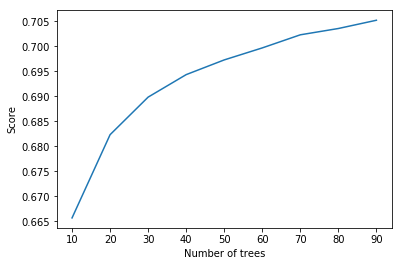

In [7]:
plt.plot(range(10,100,10),mean_score)
plt.xlabel('Number of trees')
plt.ylabel('Score')
plt.show()

# Отчет:

#### 1) Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

Признаки first_blood_time, first_blood_team, first_blood_player1, first_blood_player2 могут быть пропущены, если первая кровь так и не пролилась в первые 5 минут матча. Признаки radiant_bottle_time и dire_bottle_time могут быть пропущены, если команда не купила предмет "bottle" в первые 5 минут. Признаки radiant_courier_time, radiant_flying_courier_time, dire_courier_time, dire_flying_courier_time могут быть пропущены, если команда света/тьмы не купила курьера/летающего курьера в первые 5 минут. Признаки dire_first_ward_time и radiant_first_ward_time могут быть пропущены, если соответствующая команда не поставила вард в первые 5 минут.

#### 2) Как называется столбец, содержащий целевую переменную?

radiant_win - победа сил света

#### 3) Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.

Время выполнения на 30 деревьях по 5 блокам: 0:01:14.660263 AUC-ROC оценка при этом: 0.6897973787535268

#### 4) Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

Оценка AUC-ROC монотонно возрастает при увеличении количества деревьев, поэтому имеет смысл использовать их как можно больше. Для ускорения сходимости можно попытаться выспользоваться усечением деревьев и ограичить их глубину

# 2: Логистическая регрессия

2.1) Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

C:\Users\alexl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alexl\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C: 0.001
[0.7124653122196706, 0.7157499043907493, 0.71811453596037, 0.7142714297384568, 0.7211086079835849]
Time elapsed: 0:00:05.193883
C: 0.01
[0.7164948122985438, 0.7143192195316257, 0.7141406701891637, 0.7221694502158531, 0.7152630391762937]
Time elapsed: 0:00:05.915073
C: 0.1
[0.7186499407706142, 0.7249170912035063, 0.7161175979011758, 0.7153836397778608, 0.7074954306619639]
Time elapsed: 0:00:05.687109
C: 1
[0.7140399713142599, 0.7131047779972994, 0.7161035876647698, 0.7171233031908968, 0.7214454727778659]
Time elapsed: 0:00:05.472144
C: 10
[0.7185681050960339, 0.7164741548883783, 0.7135506535624023, 0.7179328165944188, 0.7149389172473207]
Time elapsed: 0:00:05.037211
C: 100
[0.7190352506249782, 0.7195178794173859, 0.7183309440561069, 0.7181043424128448, 0.7078208552065295]
Time elapsed: 0:00:05.135195
C: 1000
[0.7153550016658186, 0.715057033117206, 0.7174954801699156, 0.7124564767361853, 0.7204520871541801]
Time elapsed: 0:00:05.058209
C: 10000
[0.712212953662209, 0.716530411596

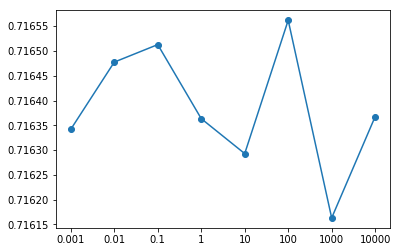

In [8]:
X = pd.DataFrame(StandardScaler().fit_transform(X))
mean_score=[]
C_range = [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for i in C_range:
    score=[]
    start_time = datetime.datetime.now()
    for train, test in kf.split(X, y):
        clf = LogisticRegression(C = i,solver='lbfgs').fit(X.iloc[train], y.iloc[train])
        pred = clf.predict_proba(X.iloc[test])[:, 1]
        score.append(roc_auc_score(y.iloc[test], pred))
    mean_score.append(np.mean(score))
    print('C:', i)
    print(score)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
print('max', max(mean_score), 'min',min(mean_score))

fig,ax = plt.subplots() 
ax.plot(mean_score,marker='o') 
ax.set_xticks([i for i in range(len(mean_score))]) 
ax.set_xticklabels(C_range) 
plt.show() 

2.2) Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

C:\Users\alexl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alexl\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C: 0.001
[0.7202224796635034, 0.7205631319432471, 0.712419455839881, 0.7140548152413086, 0.7148110274744295]
Time elapsed: 0:00:03.343476
C: 0.01
[0.7224999735051051, 0.717415785106641, 0.711905677721798, 0.7125796951470769, 0.717556121055006]
Time elapsed: 0:00:05.394156
C: 0.1
[0.7150429375040905, 0.7169907379862575, 0.7187679919969054, 0.7134180177825584, 0.7172703988690488]
Time elapsed: 0:00:04.886234
C: 1
[0.7169110274765221, 0.7155127889860319, 0.7196113033233744, 0.7161165189708474, 0.7141487007942363]
Time elapsed: 0:00:05.524847
C: 10
[0.7167480890491127, 0.7184607342403851, 0.7148763488576404, 0.7125831880213487, 0.7191964247503257]
Time elapsed: 0:00:07.021900
C: 100
[0.7167614982287409, 0.7167657580532144, 0.713867639175733, 0.7193996340239155, 0.7146925993155583]
Time elapsed: 0:00:06.731946
C: 1000
[0.7176334004835693, 0.7194836034856608, 0.713097866954555, 0.715652831237245, 0.7162810640377222]
Time elapsed: 0:00:06.239045
C: 10000
[0.719663371908389, 0.7198091730679, 0

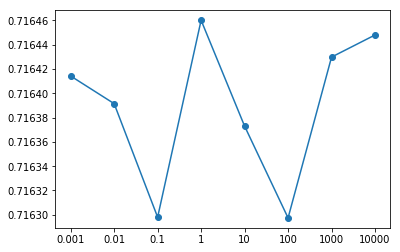

In [9]:
X=df.drop(['duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_radiant','barracks_status_dire','lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)
X=X.fillna(0)
X = pd.DataFrame(StandardScaler().fit_transform(X))
mean_score=[]
C_range = [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for i in C_range:
    score=[]
    start_time = datetime.datetime.now()
    for train, test in kf.split(X, y):
        clf = LogisticRegression(C = i,solver='lbfgs').fit(X.iloc[train], y.iloc[train])
        pred = clf.predict_proba(X.iloc[test])[:, 1]
        score.append(roc_auc_score(y.iloc[test], pred))
    mean_score.append(np.mean(score))
    print('C:', i)
    print(score)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
print('max', max(mean_score), 'min',min(mean_score))

fig,ax = plt.subplots() 
ax.plot(mean_score,marker='o') 
ax.set_xticks([i for i in range(len(mean_score))]) 
ax.set_xticklabels(C_range) 
plt.show() 

2.3) На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [10]:
heroes = pd.read_csv('C:/Users/alexl/Downloads/data/dictionaries/heroes.csv',index_col='id')
print(len(heroes))

112


2.4) Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [11]:
X_pick = np.zeros((df.shape[0], len(heroes)))
for i, match_id in enumerate(df.index):
    for p in range(5):
        X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
X_pick = pd.DataFrame(X_pick)
X = pd.concat([X, X_pick], axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X))

2.5) Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

C: 0.001
[0.7503832579721984, 0.7503497556459275, 0.7550233744003061, 0.7516387413774167, 0.7506592572255608]
Time elapsed: 0:00:08.330577
C: 0.01
[0.7488798335911475, 0.7502939093844334, 0.7535016863117072, 0.7519098884000632, 0.7537363771143641]
Time elapsed: 0:00:11.279235
C: 0.1
[0.7576023252936904, 0.7448118283525713, 0.752791766335138, 0.7533017671005622, 0.7508399848245221]
Time elapsed: 0:00:12.062129
C: 1
[0.7534587174811341, 0.7499929521039823, 0.7542700316925739, 0.7526340552177748, 0.7491992359470215]
Time elapsed: 0:00:12.528038
C: 10
[0.7489065478671865, 0.7513611487051757, 0.7544577885526031, 0.7490587365617879, 0.7552974696651968]
Time elapsed: 0:00:12.454050
C: 100
[0.7518202139112726, 0.7510694697657387, 0.7513382013949507, 0.7516932010505266, 0.7536447160198849]
Time elapsed: 0:00:12.398058
C: 1000
[0.7570007652974309, 0.7501937026950996, 0.7527066341953141, 0.7475395678362662, 0.7515952989576526]
Time elapsed: 0:00:12.406055
C: 10000
[0.7503016768763786, 0.753948292

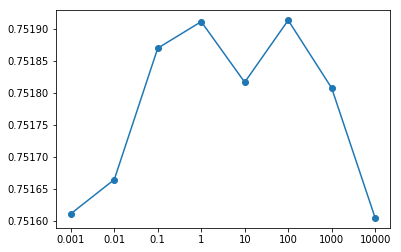

In [12]:
mean_score=[]
C_range = [0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
for i in C_range:
    score=[]
    start_time = datetime.datetime.now()
    for train, test in kf.split(X, y):
        clf = LogisticRegression(C = i,solver='lbfgs').fit(X.iloc[train], y.iloc[train])
        pred = clf.predict_proba(X.iloc[test])[:, 1]
        score.append(roc_auc_score(y.iloc[test], pred))
    mean_score.append(np.mean(score))
    print('C:', i)
    print(score)
    print ('Time elapsed:', datetime.datetime.now() - start_time)
print('max', max(mean_score), 'min',min(mean_score))


fig,ax = plt.subplots() 
ax.plot(mean_score,marker='o') 
ax.set_xticks([i for i in range(len(mean_score))]) 
ax.set_xticklabels(C_range) 
plt.show() 

# Отчет:
#### 1) Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

Логистическая регрессия работает в разы быстрее градиентного бустинга. Качество логистической регрессии на AUC-ROC кривой колеблется в районе 0.71

#### 2) Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

Удаление категориальных признаков никак не повлияло на качество модели, это может означать что их вклад в модель сравним с нулевым

#### 3) Сколько различных идентификаторов героев существует в данной игре?

112

#### 4) Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

Применение "мешка слов" слегка улучшило модель, значение AUC-ROC возрасло до 0.75

#### 5) Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

Оптимальный из алгоритмов - с применением "мешка слов". Лучшее значение AUC-ROC = 0.7521256190907969 при C = 0.01, худшее = 0.7514800148504667 при C = 0.001